# Introdução

O objetivo do projeto é apresentar um modelo ARIMA para a predição da variável: Consumo de energia industrial da região Sudeste (en_ind_se).Os dados utilizados estão publicamente disponíveis na série histórica da Empresa de Pesquisa Energética (EPE): https://www.epe.gov.br/pt/publicacoes-dados-abertos/publicacoes/consumo-de-energia-eletrica 

1.Importação de biblioteca

2.Importação de base de dados

3.Tratamento de dados

- 3.1 Seleção de amostra a partir de 2010
- 3.2 Dessazonalização
- 3.3 Teste de raiz unitária 1
- 3.4 Fazer diferença dos dados

4.Teste Augmented Dickey-Fuller (ADF)

5.Modelagem ARIMA

6.Verificação de modelo BLUE

7.Veificação de quealidade do modelo

# Fontes

In [1]:
# https://matheusduzzi.medium.com/s%C3%A9ries-temporais-no-r-e-python-774070577d5b
# https://www.youtube.com/watch?v=Tnjsik2ClT4
# https://towardsdatascience.com/arima-vs-lstm-forecasting-electricity-consumption-3215b086da77
# identificar qual modelo usar à partir de PACF e ACF: https://www.youtube.com/watch?v=tSt2FKow83Athe S
# Coding sarima: https://www.youtube.com/watch?v=Al8m6K_stfA

#https://stackoverflow.com/questions/2067095/seasonal-adjustment-in-python-and-scipy
#https://towardsdatascience.com/time-series-in-python-part-2-dealing-with-seasonal-data-397a65b74051

#Moving Average: https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/
#Making time series stationery: https://www.youtube.com/watch?v=bP1fbXd_XSk
#https://www.youtube.com/watch?v=D9y6dcy0xK8
# adf test - parametros: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
#statsmodel  - https://www.statsmodels.org/v0.12.0/api.html#regression

#https://machinelearningmastery.com/difference-time-series-dataset-python/

#About Vector Autoregressive Model: https://datascience.stackexchange.com/questions/32515/can-you-provide-examples-of-business-application-of-vector-autoregressive-model

#Outlier/ Dummy Variable: 
# https://www.kaggle.com/questions-and-answers/30372
#https://stats.stackexchange.com/questions/32528/how-to-fit-a-model-for-a-time-series-that-contains-outliers
# ht tps://towardsdatascience.com/limitations-of-arima-dealing-with-outliers-30cc0c6ddf33
# https://stackoverflow.com/questions/61124647/pandas-how-to-get-dummies-on-time-series-data

# Importação de biblioteca

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from pmdarima.arima import auto_arima

# Importação de base de dados

In [3]:
df = pd.read_excel('energia_ind_se.xlsx', index_col = 0, usecols = [0,1])

# Tratamento de dados

 - .1 Seleção de dados à partir de 2010 

Uma vez que de 2008 a 2009 há outliers devido a crise de 2008, utliza-se os dados à partir de janeiro de 2010

In [4]:
df1 = df[72:210]

- .2 Dessazonalização 

Utiliza-se o método de médias móveis com um período de três meses para fazer a dessazonalização

In [5]:
df2 = df1.rolling(window=3)
df2_mean = df2.mean()

In [6]:
df3 = df2_mean.dropna()

#Comparando-se o gráfico original com o dessazonalizado tem-se:

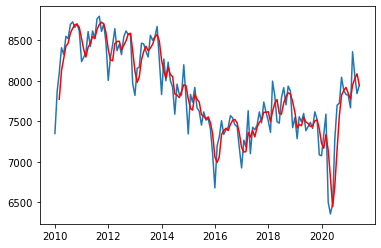

In [7]:
# plot original and transformed dataset
plt.plot(df1)
plt.plot(df3, color='red')

- .3 Diferenciação

Ao se fazer uma análise do gráfico acima pode-se inferir que a variável não apresenta uma média e nem variância e constantes. Além disso, ela aparenta ter uma tendência estocástica. Dessa forma, para se obter uma série estacionária converte-se a série para sua primeira diferença 

In [8]:
df4 = df3.diff().dropna()

# Teste Dickey-Fuller Aumentado 

In [9]:
data_adf3 = adfuller(df4, regression='n')

In [10]:
print('estatística f:', data_adf3[0])
print('p-valor:', data_adf3[1])

estatística f: -2.863432278289878
p-valor: 0.004102520708116143


A partir do teste ADF, pode-se constatar que a estacionariedade foi atingida na primeira diferença, numa equação de regressão sem tendência e nem intercepto 

# Modelagem ARIMA

#Utiliza-se a biblioteca Auto-Arima para se conseguir o melhor modelo a partir do critério definido
- Como atestado na seção anterior, o parâmetro d e D´são configurados para a primeira diferença.
- O critério de seleção utilizado é o Akaike, um indicador de erro dos modelos

In [11]:
model=auto_arima(df3, start_p=0, start_q=0, max_p=12, max_q=12, m=12, stepwise=True, seasonal=True, information_criterion='aic', trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = None, n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1512.895, Time=1.54 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1540.017, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1479.870, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1489.132, Time=0.42 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1499.232, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1479.169, Time=0.61 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1481.057, Time=1.65 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1479.660, Time=0.54 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1510.296, Time=0.46 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1480.865, Time=0.79 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1481.055, Time=0.81 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1489.579, Time=0.62 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=1476.979, Time=2.34 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1479.324, Time=0.93 sec
 ARIMA(2,1,1)(2,1,1

In [12]:
model.aic()

1455.0103276121088

Após o a simulação dos modelos chega-se que o modelo de Menor Akaike é o modelo aciima

# Treino modelo

In [13]:
train=df.loc['2010-01-01':'2020-03-01']
test=df.loc['2020-04-01':]

In [14]:
model_fit = model.fit(train)

In [15]:
model_fit

ARIMA(order=(4, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

# Verificação de modelo BLUE

# Testes  

In [16]:
# dúvida: as informações do summary são da variável do modelo ou do fit do modelo?

In [101]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  123
Model:             SARIMAX(4, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -724.312
Date:                            Mon, 15 Nov 2021   AIC                           1462.624
Time:                                    22:19:03   BIC                           1481.527
Sample:                                         0   HQIC                          1470.291
                                            - 123                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4701      0.074     -6.391      0.000      -0.614      -0.326
ar.L2         -0.0797      0.097     -0.819      0.413      -0.270       0.111
ar.L3          0.1533      0.109      1.405      0.160      -0.061       0.367
ar.L4          0.1548      0.095      1.631      0.103      -0.031       0.341
ar.S.L12      -0.4697      0.096     -4.869      0.000      -0.659      -0.281
ar.S.L24      -0.4266      0.101     -4.233      0.000      -0.624      -0.229
sigma2      2.818e+04   4092.560      6.887      0.000    2.02e+04    3.62e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.91   Prob(JB):                         0.98
Heteroskedasticity (H):               2.17   Skew:                            -0.04
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

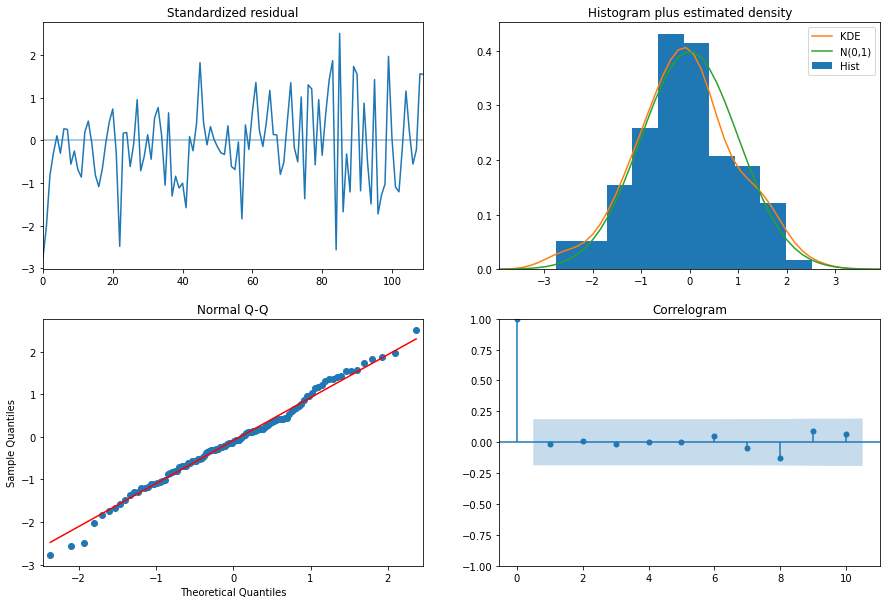

In [102]:
model.plot_diagnostics(figsize=(15, 10));

A partir da análise do Teste Jarque-Bera, conclui-se que o medelo segue uma distribuição Normal. A partir do teste L-Jung Box e da análise do correlograma, pode-se constatar que a série não apresenta autocorrelção serial. No entanto, ainda apresenta heterocedasticidade

# Projeção 

In [71]:
forecast = model.predict(n_periods=15)

In [75]:
forecast1 = pd.DataFrame(forecast,index=test.index, columns=['Projeção do modelo'])

In [85]:
forecast1.head(10)

,Projeção do modelo
data,
2020-04-01,7656.669073
2020-05-01,7545.693502
2020-06-01,7600.279417
2020-07-01,7612.792438
2020-08-01,7672.752245
2020-09-01,7709.913413
2020-10-01,7765.483814
2020-11-01,7822.322001
2020-12-01,7521.674798


<Figure size 1296x360 with 0 Axes>

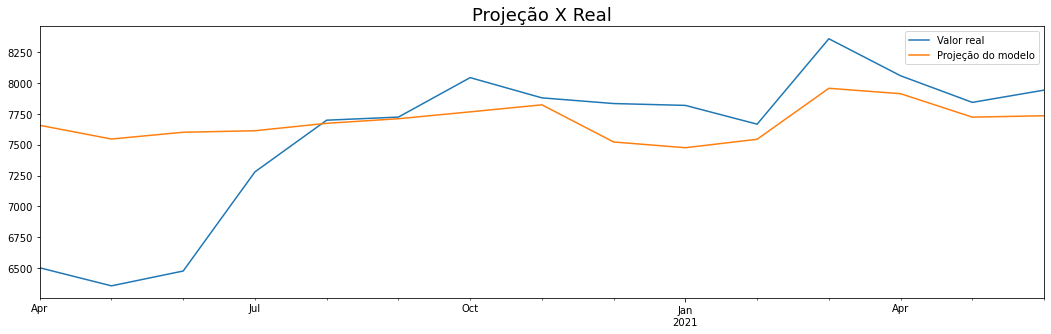

In [96]:
plt.figure(figsize=(18,5))
pd.concat([test,forecast1],axis=1).plot(figsize=(18,5))
plt.title('Projeção X Real',size=18)
plt.xlabel('')
plt.legend(['Valor real','Projeção do modelo'])
plt.show();

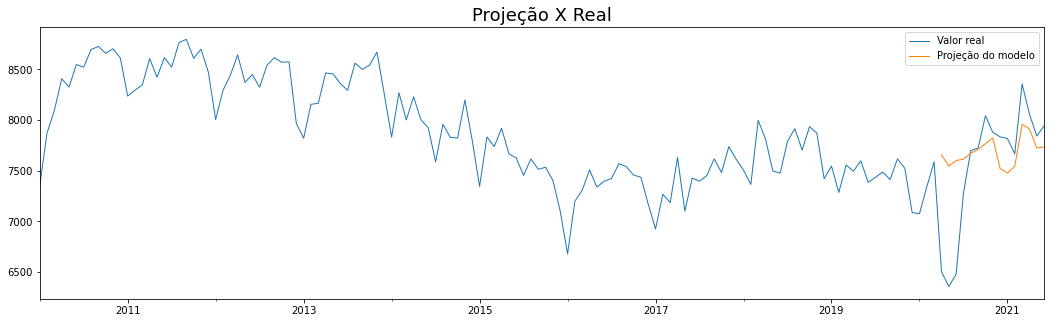

In [98]:
pd.concat([df1,future_forecast],axis=1).plot(linewidth=1,figsize=(18,5))
plt.legend(['Valor real','Projeção do modelo'])
plt.title('Projeção X Real',size=18)
plt.xlabel('')
plt.show();

# Conclusão